In [1]:
import numpy as np

# Numpy
## Operazioni tra vettori

In [2]:
x = np.array([1,4,2,1])
y = np.array([9,1,2,3])

print(x*y)
print(x+y)

[9 4 4 3]
[10  5  4  4]


## Operazioni tra matrici

In [4]:
X = np.array([[1,23,3],[3,2,1],[4,3,2]])

# element wise

print(X+X) 

print(X*X)

# matricial product

print(X@X.T)


[[ 2 46  6]
 [ 6  4  2]
 [ 8  6  4]]
[[  1 529   9]
 [  9   4   1]
 [ 16   9   4]]
[[ 82  78  32]
 [ 13  76  13]
 [ 21 104  19]]


## Trasposta

In [5]:
print(X)

print(X.T)


[[ 1 23  3]
 [ 3  2  1]
 [ 4  3  2]]
[[ 1  3  4]
 [23  2  3]
 [ 3  1  2]]


## Dimensioni

In [6]:
print(x.shape)
print(X.shape)

(4,)
(3, 3)


## Zeros, Ones and Full

In [8]:
z = np.zeros((2,3))
p = np.ones((2,3))
r = np.full((2,3),4)

print(z)
print(p)
print(r)

[[0. 0. 0.]
 [0. 0. 0.]]
[[1. 1. 1.]
 [1. 1. 1.]]
[[4 4 4]
 [4 4 4]]


## Where

In [12]:
print(x)
print(np.where(x>3))

[1 4 2 1]
(array([1]),)


In [13]:
# accesso tramite indice
print(x[np.where(x>3)])

# accesso tramite booleano
print(x[x>3])

array([4])

## Intervalli

In [16]:
print(x)

# x[start:stop:step]
print(x[2:5])
print(x[1:5:2])

[1 4 2 1]
[2 1]
[4 1]


## Dim e trace

In [18]:
print(x.ndim)
print(X.trace())

1
5


## Sort

In [19]:
print(x)
print(np.sort(x))

[1 4 2 1]
[1 1 2 4]


## sort su matrici (più dimensioni)

In [28]:
from matplotlib.pyplot import axis

print("X base")
print(X)
print("Default sort")       # sort su axis = 1
print(np.sort(X))
print("Axis 0")             # effettua ordinamento per riga
print(np.sort(X,axis=0))
print("Axis 1")             # effettua ordinamento per colonna
print(np.sort(X,axis=1))

X base
[[ 1 23  3]
 [ 3  2  1]
 [ 4  3  2]]
Default sort
[[ 1  3 23]
 [ 1  2  3]
 [ 2  3  4]]
Axis 0
[[ 1  2  1]
 [ 3  3  2]
 [ 4 23  3]]
Axis 1
[[ 1  3 23]
 [ 1  2  3]
 [ 2  3  4]]


In [30]:
# tipo di sorting specificabile con kind
np.sort(x,kind='quick')

array([1, 1, 2, 4])

In [31]:
print(x)
print(np.sort(x))

# prende gli indici del vettore originale in ordine
print(np.argsort(x)) 

[1 4 2 1]
[1 1 2 4]
[0 3 2 1]


### order

In [42]:
dtype = [('name','U10'),('age',int)]
order_example = np.array([('B',1),('A',2)],dtype=dtype)
print(order_example)
print(np.sort(order_example,order='name'))
print(np.sort(order_example,order='age'))

[('B', 1) ('A', 2)]
[('A', 2) ('B', 1)]
[('B', 1) ('A', 2)]


# Random

In [ ]:
import numpy.random

In [48]:
print(np.random.random((2,2)))            # values between zero and 1
print(np.random.randint(20,size=(2,2)))   # max is the first argument
print(np.random.randint(5,20,size=(2,2))) # min and max as the first two arguments

# seed can be specified


[[0.56628658 0.39732169]
 [0.37958486 0.92942015]]
[[5 3]
 [9 7]]
[[ 6 12]
 [11 13]]
[1 4 2 1]
[4 1 2 1]


In [57]:
print("before ",y)
np.random.shuffle(y) # change x 
print("after shuffle ",y)
print()
# create a copy

print("permutation ", np.random.permutation(y))
print("original ",y)

before  [1 9 3 2]
after shuffle  [2 1 9 3]

permutation  [1 3 9 2]
original  [2 1 9 3]


# Linear algebra

In [ ]:
import numpy.linalg

In [58]:
print(X)

np.linalg.inv(X)

[[ 1 23  3]
 [ 3  2  1]
 [ 4  3  2]]


array([[-0.02380952,  0.88095238, -0.4047619 ],
       [ 0.04761905,  0.23809524, -0.19047619],
       [-0.02380952, -2.11904762,  1.5952381 ]])

In [59]:
np.linalg.det(X)

-41.999999999999986

In [60]:
np.linalg.pinv(X) # pseudo inv, it works even with a matrix with det = 0

array([[-0.02380952,  0.88095238, -0.4047619 ],
       [ 0.04761905,  0.23809524, -0.19047619],
       [-0.02380952, -2.11904762,  1.5952381 ]])

# C file integration

You can integrate your python envirorment with C code.

Command used to create the .so file:
- gcc -c -fPIC add.c -o add.o 
- gcc add.o -shared -o add.so 

In [2]:
import ctypes

dll = ctypes.CDLL('./add.so')


In [7]:
dll.add.argtypes=[np.ctypeslib.ndpointer(),ctypes.c_int]
dll.add.restype=ctypes.c_double

In [16]:
random_vector=np.random.random(10000)
n = random_vector.shape[0]

In [21]:
%%time
dll.add(random_vector,n)

CPU times: user 207 µs, sys: 58 µs, total: 265 µs
Wall time: 216 µs


4966.244421550173

In [24]:
%%time
ret = 0
for x in random_vector:
    ret+=x
ret

CPU times: user 1.29 ms, sys: 0 ns, total: 1.29 ms
Wall time: 1.29 ms


4966.244421550173

In [25]:
%%time
ret = 0
for i in range(0,random_vector.shape[0]):
    ret+=random_vector[i]
ret

CPU times: user 1.71 ms, sys: 61 µs, total: 1.78 ms
Wall time: 1.78 ms


4966.244421550173

C function seems very fast

# Matplot lib

In [74]:
import matplotlib
import matplotlib.pyplot as plt

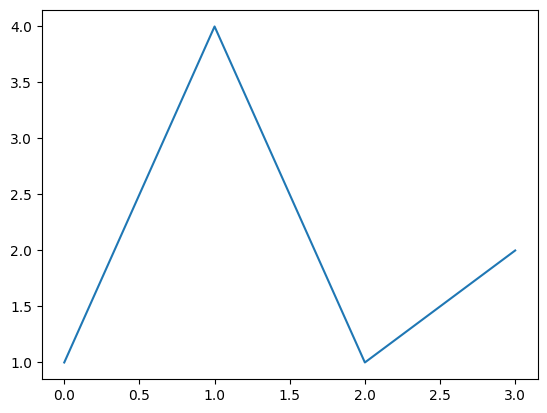

In [75]:
plt.plot(x)

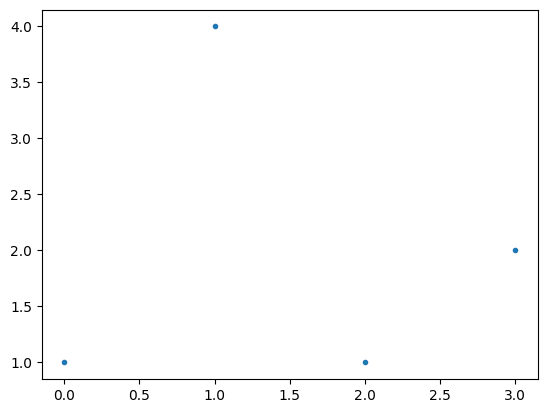

In [76]:
plt.plot(x,'.')

(0.0, 7.0, 0.0, 7.0)

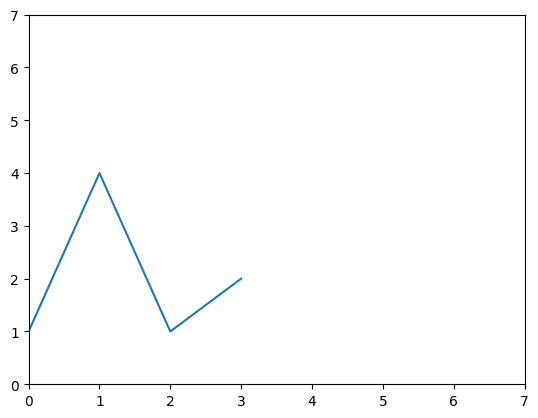

In [77]:
plt.plot(x)
plt.axis([0,7,0,7])

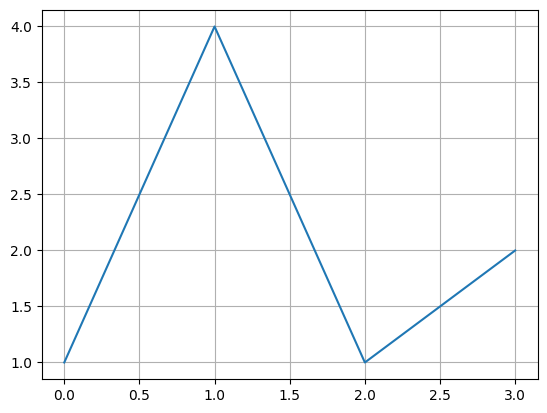

In [78]:
plt.plot(x)
plt.grid()
plt.show()

# Scipy

In [79]:
import scipy as sc
import scipy.optimize

In [81]:
def f(x) : return x**2 - 2*x + 4


In [93]:
a = sc.optimize.minimize(f,0)
print(a)
y_star = a['fun']
x_star = a['x'][0]

      fun: 3.0000000000000004
 hess_inv: array([[0.49999999]])
      jac: array([-2.98023224e-08])
  message: 'Optimization terminated successfully.'
     nfev: 6
      nit: 2
     njev: 3
   status: 0
  success: True
        x: array([0.99999998])


In [89]:
x_values = range(-10,15,1)
y_values = []
for el in x_values:
    y_values.append(f(el))


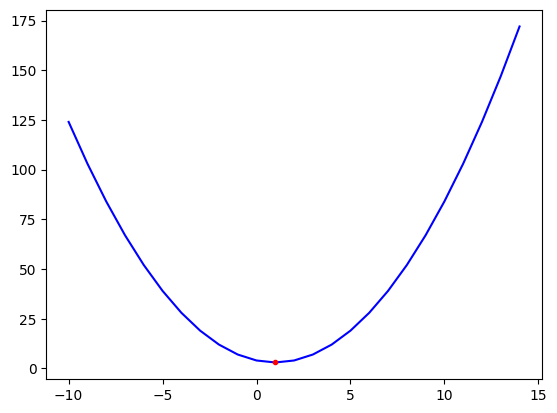

In [99]:

plt.plot(x_values,y_values,color='blue')
plt.plot(x_star,y_star,'.',color='red')
plt.show()

In [105]:
def f2(x,a,b,c,d): return a*x**3+b*x**2+c*x+d

# sc.optimize.curve_fit(f2,[1,2,3,4],[4,1,4,6]) doesn't work

In [104]:
# sc.interpolate() interpolazione
# sc.ndimage to elaborate images

In [109]:
# sc.stats.gamma

# Example linear regression

In [2]:
ds1 = np.genfromtxt('./ds_adolescenti.csv',delimiter=';')
ds2 = np.genfromtxt('./ds_atleti.csv',delimiter=';')

In [115]:
ds1

array([[ 1.62110522, 54.87610387],
       [ 1.76461064, 62.17308969],
       [ 1.75572064, 55.15996198],
       ...,
       [ 1.69422496, 56.67074209],
       [ 1.73201406, 61.26009897],
       [ 1.78551002, 61.67481847]])

In [117]:
ds2

array([[ 1.85924765, 81.4907966 ],
       [ 1.90160727, 97.1785971 ],
       [ 1.80491021, 95.14240565],
       ...,
       [ 1.8858599 , 93.04467892],
       [ 1.88426136, 86.50786322],
       [ 1.87479459, 88.35356741]])

Text(0, 0.5, 'peso in kg')

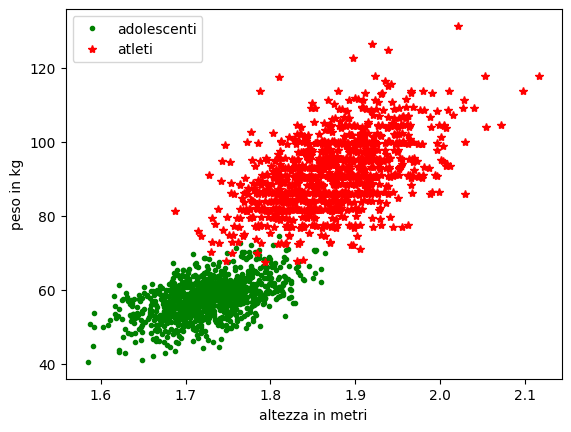

In [123]:
plt.plot(ds1[:,0],ds1[:,1],'.',color='green',label='adolescenti')
plt.plot(ds2[:,0],ds2[:,1],'*',color='red',label='atleti')
plt.legend()
plt.xlabel('altezza in metri')
plt.ylabel('peso in kg')


In [3]:
import sklearn 
import sklearn.linear_model

In [4]:
from sklearn.linear_model import LinearRegression


clf = LinearRegression()
clf.fit(ds1[:,0:1],ds1[:,1:2])

LinearRegression()

In [5]:
m1 = clf.coef_[0][0]
q1 = clf.intercept_

def retta(x,m,q):
    return m*x+q

In [148]:
clf.fit(ds2[:,0:1],ds2[:,1:2])
m2 = clf.coef_[0][0]
q2 = clf.intercept_


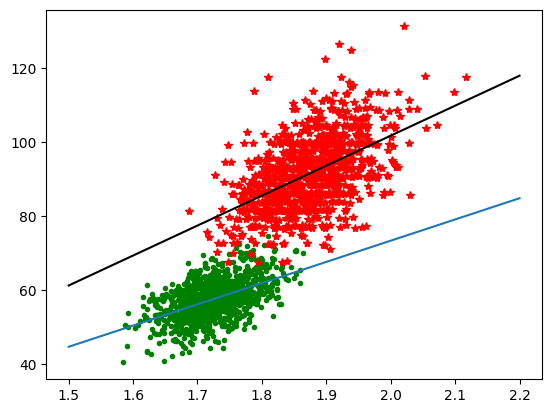

In [150]:
from numpy import linspace


x_range_line = linspace(1.5,2.2)

plt.plot(ds1[:,0],ds1[:,1],'.',color='green',label='adolescenti')
plt.plot(ds2[:,0],ds2[:,1],'*',color='red',label='atleti')
plt.plot(x_range_line,retta(x_range_line,m1,q1))
plt.plot(x_range_line,retta(x_range_line,m2,q2),color='black')

In [152]:
print(np.polyfit(ds1[:,0],ds1[:,1],deg=1))
print(m1," ",q1)

[ 57.40254783 -41.40550287]
57.402547832512305   [-41.40550287]


In [155]:
ds = np.block([ds1[:,0:1]**2,ds1[:,0:1]])
clf.fit(ds,ds1[:,1:2])

LinearRegression()

In [159]:
print(clf.coef_)
print(clf.intercept_)

[[ 19.52796065 -10.04201317]]
[16.78439885]


In [164]:
quad_pol = np.poly1d([clf.coef_[0][0],clf.coef_[0][1],clf.intercept_])


/opt/homebrew/lib/python3.10/site-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


In [166]:
y_values_quad=[]
for el in x_range_line:
    y_values_quad.append(quad_pol(el))

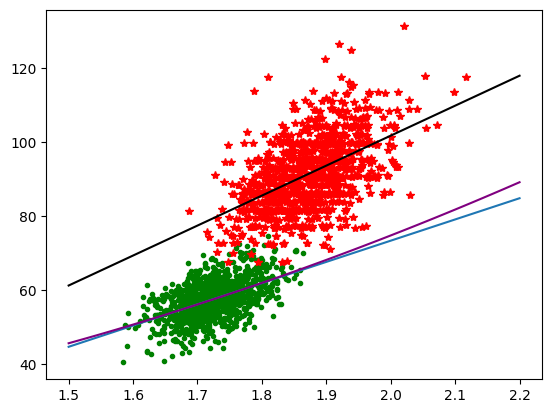

In [170]:
plt.plot(ds1[:,0],ds1[:,1],'.',color='green',label='adolescenti')
plt.plot(ds2[:,0],ds2[:,1],'*',color='red',label='atleti')
plt.plot(x_range_line,retta(x_range_line,m1,q1))
plt.plot(x_range_line,retta(x_range_line,m2,q2),color='black')
plt.plot(x_range_line,quad_pol(x_range_line),color='purple')

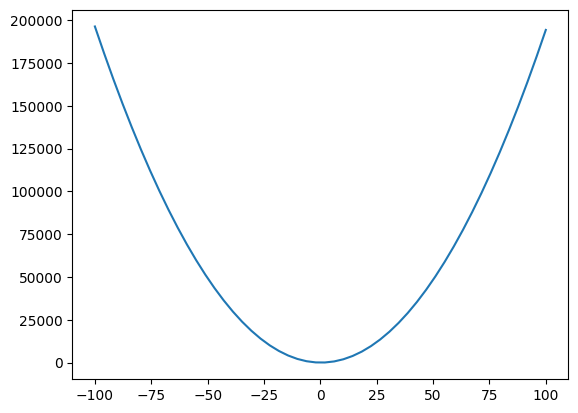

In [171]:
tmp = linspace(-100,100)
plt.plot(tmp,quad_pol(tmp))

In [6]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input, Dropout
from tensorflow.keras.models import Model

In [44]:
i = Input((1,))
x = Dense(1)(i)

model = Model(i,x)

epochs=200
learning_rate = 0.1
decay_rate = learning_rate / epochs
momentum = 0.8
sgd = tf.keras.optimizers.SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)

model.compile(
    loss='mse',
    optimizer=sgd
)

r = model.fit(
    ds1[:,0:1],ds1[:,1:2],
    validation_split=0.2,
    epochs=epochs
)

Epoch 1/200
26/26 [==============================] - 0s 3ms/step - loss: 757.4664 - val_loss: 264.6945
Epoch 2/200
26/26 [==============================] - 0s 969us/step - loss: 76.0608 - val_loss: 28.0695
Epoch 3/200
26/26 [==============================] - 0s 915us/step - loss: 25.3484 - val_loss: 19.2220
Epoch 4/200
26/26 [==============================] - 0s 960us/step - loss: 25.6946 - val_loss: 20.2146
Epoch 5/200
26/26 [==============================] - 0s 899us/step - loss: 27.0985 - val_loss: 24.4833
Epoch 6/200
26/26 [==============================] - 0s 934us/step - loss: 24.4343 - val_loss: 22.2039
Epoch 7/200
26/26 [==============================] - 0s 905us/step - loss: 23.6420 - val_loss: 18.8634
Epoch 8/200
26/26 [==============================] - 0s 950us/step - loss: 23.8083 - val_loss: 18.6080
Epoch 9/200
26/26 [==============================] - 0s 985us/step - loss: 25.9031 - val_loss: 18.5491
Epoch 10/200
26/26 [==============================] - 0s 984us/step - los

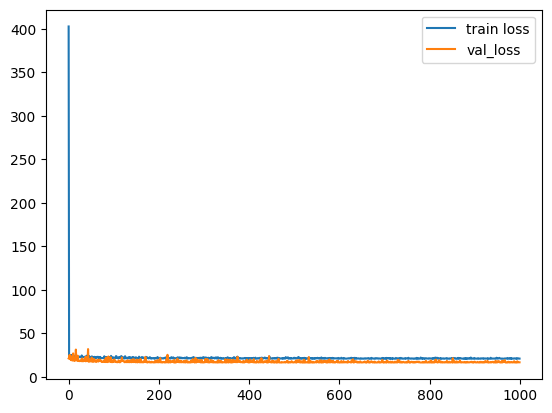

In [31]:
plt.plot(r.history['loss'],label='train loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()

In [34]:
print(model.layers[1].get_weights())
print(m1," ",q1)

[array([[56.39357]], dtype=float32), array([-39.41735], dtype=float32)]
57.402547832512305   [-41.40550287]


2/2 [==============================] - 0s 774us/step


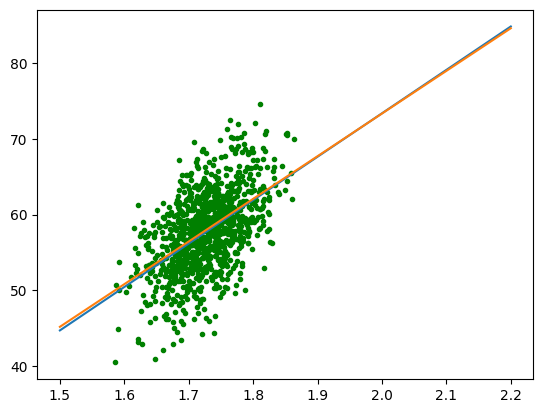

In [35]:
x_range_line = np.linspace(1.5,2.2)
plt.plot(ds1[:,0],ds1[:,1],'.',color='green',label='adolescenti')
plt.plot(x_range_line,retta(x_range_line,m1,q1))
plt.plot(x_range_line,model.predict(x_range_line))

In [264]:
for l in model.layers:
    print(l.get_weights())

[]
[array([[25.05094]], dtype=float32), array([14.85961], dtype=float32)]
